# Frequency Distribution

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

In [2]:
data = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## Sorting

In [3]:
data = np.sort(data)
data

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [4]:
data.max(), data.min()

(173, 150)

In [5]:
data_freq = np.unique(data, return_counts=True)

In [6]:
data_freq[1]

array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1])

<BarContainer object of 22 artists>

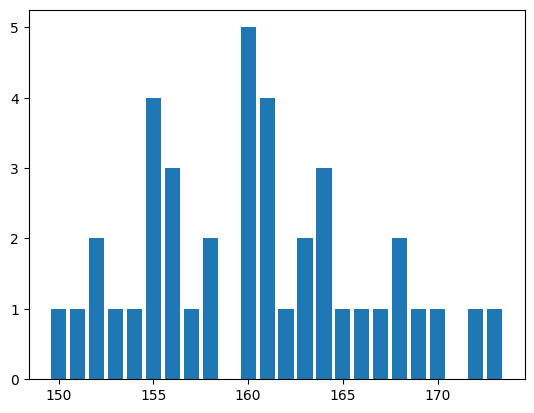

In [7]:
plt.bar(x=data_freq[0], height=data_freq[1])

## Getting number of classes by sturges formula

 - Sturge formula
    
    $ i = 1 + 3.3 \log n $

    $ n $ = data length

In [8]:
# Using sturges formula
n = len(data)

def sturges(data_length)->int:
    i = 1 + 3.3 * np.log10(data_length)
    # We have to round the outuput value from sturges formula
    return round(i)

i = sturges(data_length=n)
print(f'Number of classes: {i}')

Number of classes: 6


## Range width

 - Formulas:

    $ AA = Xmax - Xmin $

    $ AA $ = sampling amplitude

    $ h = AA / i $

    $ h $ = range with

    $ i $ = number of classes

In [9]:
def range_width(data)->int:
    AA = data.max() - data.min()
    h = AA/i
    # We have to round up the result
    return int(np.ceil(h))

h = range_width(data)
print(f'Range with: {h}')

Range with: 4


## Creating the frequency distribution

### Manual approach

In [10]:
intervals = np.arange(data.min(), data.max() + 2, step=h)
intervals

array([150, 154, 158, 162, 166, 170, 174])

In [11]:
freq_distribution_interval = {}

for i in range(len(intervals) - 1):
    freq_distribution_interval[f'{intervals[i]}-{intervals[i+1]}'] = len(np.where(np.logical_and(data>=intervals[i], data<intervals[i+1]))[0])

freq_distribution_interval

{'150-154': 5,
 '154-158': 9,
 '158-162': 11,
 '162-166': 7,
 '166-170': 5,
 '170-174': 3}

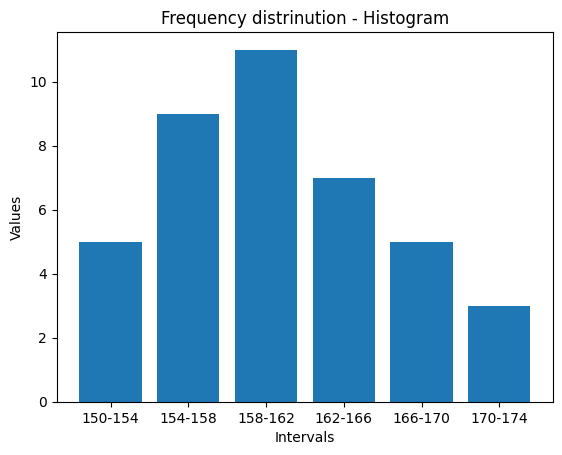

In [12]:
plt.bar(freq_distribution_interval.keys(), freq_distribution_interval.values())
plt.title('Frequency distrinution - Histogram')
plt.xlabel('Intervals')
plt.ylabel('Values')
plt.show();

### Using numpy and matplotlib

In [13]:
intervals, classes = np.histogram(data, bins='sturges')
intervals, classes

(array([ 5,  8,  3, 12,  5,  4,  3]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

(array([ 5.,  8.,  3., 12.,  5.,  4.,  3.]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]),
 <BarContainer object of 7 artists>)

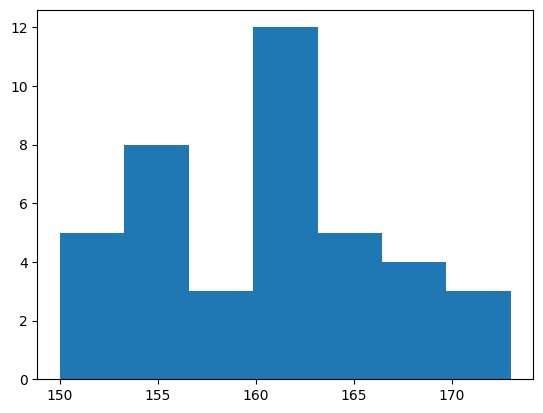

In [14]:
plt.hist(data, bins=classes)

### Using pandas and seaborn

In [15]:
df = pd.DataFrame({'data':data})
df.head()

,data
0,150
1,151
2,152
3,152
4,153


Pandas approach

<AxesSubplot: ylabel='Frequency'>

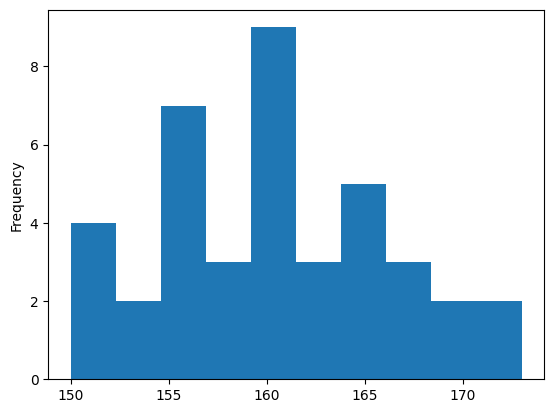

In [16]:
df.data.plot.hist()

seaborn approach

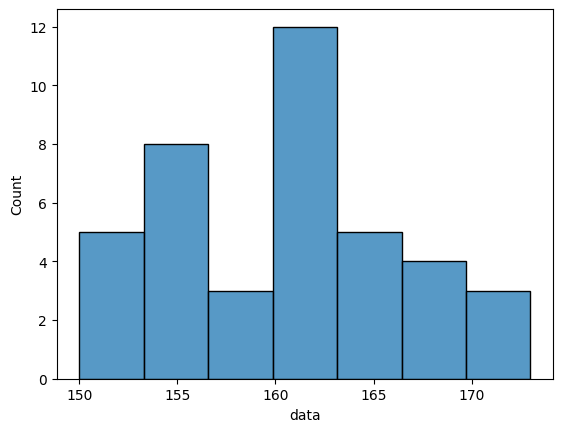

In [17]:
sns.histplot(df.data);

# Testing in a database 

In [18]:
df = pd.read_csv('../Bases de dados/census.csv')
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.age.head()

0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

## Frequency distribution

### Matplotlib and numpy approat

In [20]:
intervals, classes = np.histogram(df.age, bins='sturges')

(array([3130., 4066., 3376., 4353., 3399., 3876., 2722., 2716., 1924.,
        1225.,  917.,  389.,  273.,   96.,   51.,   48.]),
 array([17.    , 21.5625, 26.125 , 30.6875, 35.25  , 39.8125, 44.375 ,
        48.9375, 53.5   , 58.0625, 62.625 , 67.1875, 71.75  , 76.3125,
        80.875 , 85.4375, 90.    ]),
 <BarContainer object of 16 artists>)

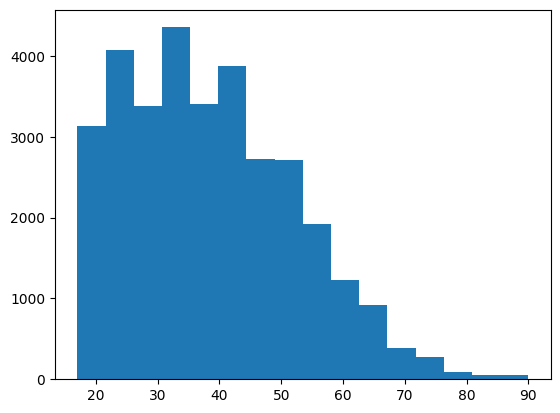

In [21]:
plt.hist(df.age, bins=classes)

### Pandas and seaborn approat

Pandas

<AxesSubplot: ylabel='Frequency'>

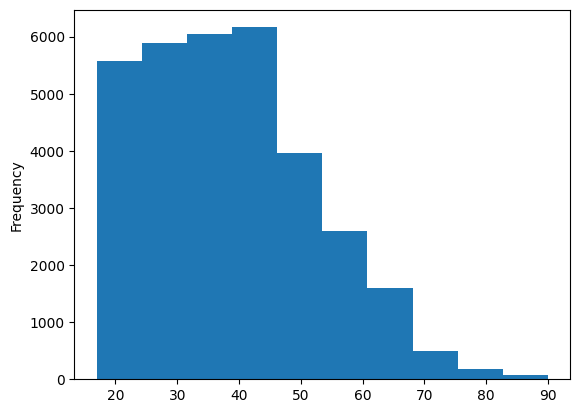

In [22]:
df.age.plot.hist()

Seaborn

<AxesSubplot: xlabel='age', ylabel='Count'>

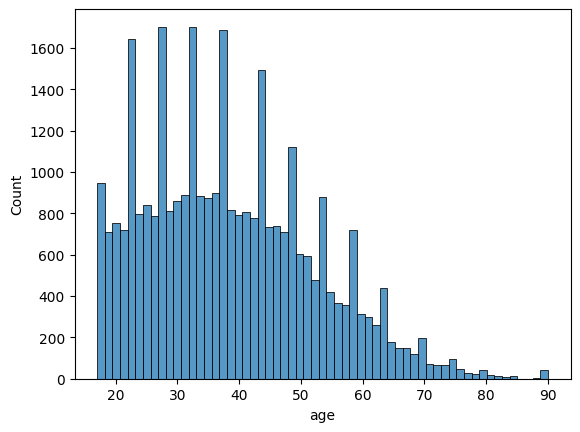

In [23]:
sns.histplot(df.age)

In [24]:
df['intervals'] = pd.cut(df.age, bins=[0, 17, 25, 40, 60, 90], 
                                 labels=['first', 'second', 'third', 'fourth', 'fifth'])

df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income,intervals
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,third
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,fourth
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,third
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,fourth
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,third


In [25]:
df.intervals.unique()

['third', 'fourth', 'second', 'fifth', 'first']
Categories (5, object): ['first' < 'second' < 'third' < 'fourth' < 'fifth']

## Association rules with Apriori

Apriori works only with categorical types

In [33]:
df_apriori = df.select_dtypes(include=['object', 'category']).sample(n=1000)
df_apriori.shape

(1000, 10)

In [34]:
df_apriori.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,intervals
6456,Private,HS-grad,Never-married,Other-service,Not-in-family,Black,Male,United-States,<=50K,third
13979,Private,HS-grad,Never-married,Farming-fishing,Not-in-family,White,Male,United-States,<=50K,third
6281,Private,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K,fourth
19591,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,<=50K,fourth
3692,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,>50K,fourth


In [55]:
transactions = [[str(df_apriori.values[i, j]) for j in range(df_apriori.shape[1])] for i in range(df_apriori.shape[0])]
len(transactions)

1000

In [56]:
transactions[:2]

[[' Private',
  ' HS-grad',
  ' Never-married',
  ' Other-service',
  ' Not-in-family',
  ' Black',
  ' Male',
  ' United-States',
  ' <=50K',
  'third'],
 [' Private',
  ' HS-grad',
  ' Never-married',
  ' Farming-fishing',
  ' Not-in-family',
  ' White',
  ' Male',
  ' United-States',
  ' <=50K',
  'third']]

In [58]:
rules = apriori(transactions=transactions, min_min_support = 0.3, min_confidence = 0.2)
results = list(rules)
print(f'Total rules created: {len(results)}')

Total rules created: 668


In [59]:
results

[RelationRecord(items=frozenset({' <=50K'}), support=0.772, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.772, lift=1.0)]),
 RelationRecord(items=frozenset({' >50K'}), support=0.228, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' >50K'}), confidence=0.228, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.345, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.345, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.315, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.315, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.415, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.415, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.655, ordered_

gets a random result to check it out